In [1]:
import numpy as np
import alc

In [2]:
X_train, Y_train, X_val, Y_val = alc.cargarDataset("cats_and_dogs/")

print(X_train.shape, Y_train.shape)  # (1536, 3000) (2, 3000)
print(X_val.shape, Y_val.shape)      # (1536, 2000) (2, 2000)

(1536, 2000) (2, 2000)
(1536, 1000) (2, 1000)


In [ ]:
Wchols, pXchols = alc.fullyConectedCholesky(X_train, Y_train)
print("Cholesky terminado")
Wgm, pXgm = alc.fullyConnectedQR(X_train, Y_train, metodo="GS")
print("Gram-Schmidt terminado")
Whh, pXhh = alc.fullyConnectedQR(X_train, Y_train, metodo="HH")
print("Householder terminado")

Cholesky terminado
Gram-Schmidt terminado
Householder terminado


In [5]:
print("Calcula bien pseudoinversa con Cholesky: ", alc.esPseudoInversa(X_train, pXchols, tol=1e-8))
print("Calcula bien pseudoinversa con Gram-Schmidt: ", alc.esPseudoInversa(X_train, pXgm, tol=1e-8))
print("Calcula bien pseudoinversa con Householder: ", alc.esPseudoInversa(X_train, pXhh, tol=1e-8))

Calcula bien pseudoinversa con Cholesky:  True
Calcula bien pseudoinversa con Gram-Schmidt:  True
Calcula bien pseudoinversa con Householder:  True


In [6]:
# GUardar los pesos obtenidos
np.save("wsfacu/Wchols.npy", Wchols)
np.save("wsfacu/pXchols.npy", pXchols)
np.save("wsfacu/Wgm.npy", Wgm)
np.save("wsfacu/pXgm.npy", pXgm)
np.save("wsfacu/Whh.npy", Whh)
np.save("wsfacu/pXhh.npy", pXhh)

In [8]:
# Generar predicciones de cada uno
# Y_pred_svd = Wsvd @ X_val
Y_pred_chols = alc.prodMat(Wchols, X_val)
Y_pred_gm = alc.prodMat(Wgm, X_val)
Y_pred_hh = alc.prodMat(Whh, X_val)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_simple(Y_pred, Y_val):
    # 1. Predicciones
    y_pred = np.argmax(Y_pred, axis=0)
    y_true = np.argmax(Y_val, axis=0)

    # 2. Matriz de confusión
    M = np.zeros((2,2), dtype=int)
    for t,p in zip(y_true, y_pred):
        M[t,p] += 1

    # 3. Accuracy
    acc = np.trace(M) / np.sum(M)

    return M, acc



Matriz de confusión:
 [[334 166]
 [150 350]]
Accuracy Cholesky: 0.684


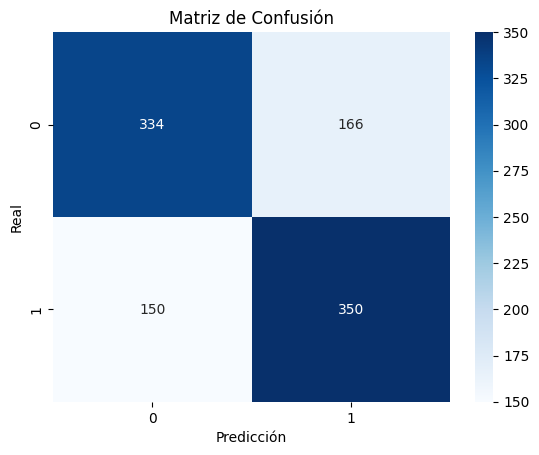

In [18]:
# Evaluar accuracy de cada método
M_chols, acc_chols = confusion_matrix_simple(Y_pred_chols, Y_val)
print("Matriz de confusión:\n", M_chols)
print("Accuracy Cholesky:", acc_chols)


sns.heatmap(M_chols, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()



Matriz de confusión:
 [[334 166]
 [150 350]]
Accuracy QR (Gram-Schmidt): 0.684


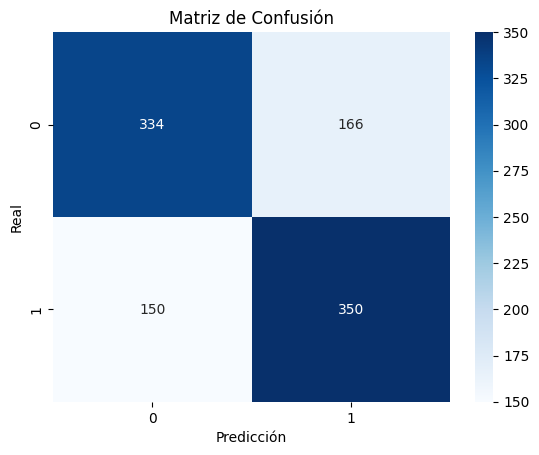

In [19]:
M_gm, acc_gm = confusion_matrix_simple(Y_pred_gm, Y_val)
print("Matriz de confusión:\n", M_gm)
print("Accuracy QR (Gram-Schmidt):", acc_gm)

sns.heatmap(M_gm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()



Matriz de confusión:
 [[334 166]
 [150 350]]
Accuracy QR (Householder): 0.684


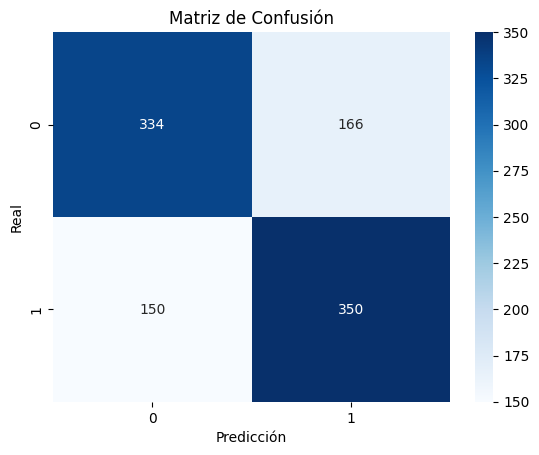

In [20]:
M_hh, acc_hh = confusion_matrix_simple(Y_pred_hh, Y_val)
print("Matriz de confusión:\n", M_hh)
print("Accuracy QR (Householder):", acc_hh)

sns.heatmap(M_hh, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
